# Week 7 – Renormalisation and Fractals

### Aim: Work through lectures 21–23 and ch. 4 of the OOP module.

#### Schedule
Monday – Lecture 21 + *The Misbehaviour of Markets*

Tuesday –

Wednesday –

Thursday –

Friday – Lecture 22 + exercises

Satruday – Weekly blog post

Sunday – Lecture 23 + notebook uploaded to GitHub

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import slicc_tools as st

## Lecture 21 – Feigenbaum's Renormalisation Analysis of Period Doubling

### Renormalisation (ch. 10.7)

**Note**: This is conceptually one of the most challenging parts of the course.

**See**: Simon DeDeo's Complexity Explorer course [Introduction to Renormalization](https://www.complexityexplorer.org/courses/67-introduction-to-renormalization).
> Some of these topics are also covered ingreater detail in the statistical physics courses offered in later years.



Define *superstable* fixed points and cycles.

$x_{n+1} = f \left( x_n \right)$ which has the fixed point(s) $f \left( x^* \right) = x^*$.

Consider small deviation $x_n = x^* + \eta_n$ where $\eta_{n+1} = f' \left( x^* \right) \eta_n + ... \Rightarrow x^*$ linearly stable $\Leftrightarrow | f' \left( x^* \right) | < 1$.

If $| f' \left( x^* \right) | = 0$, the fixed point $x^*$ is *superstable*.

$\Rightarrow \eta_{n+1} = \frac{1}{2} f'' \left( x^* \right) \eta_n^2 + ...$ from the Taylor expansion $\Rightarrow$ quadratically fast convergence.
\
\
\
A superstable p-cycle occurs when $x_m$ is a fixed point of $f^p$, i.e. $x_m$ is one of the points participating in the p-cycle.
> **See**: Example 10.7.1 (p. 387)

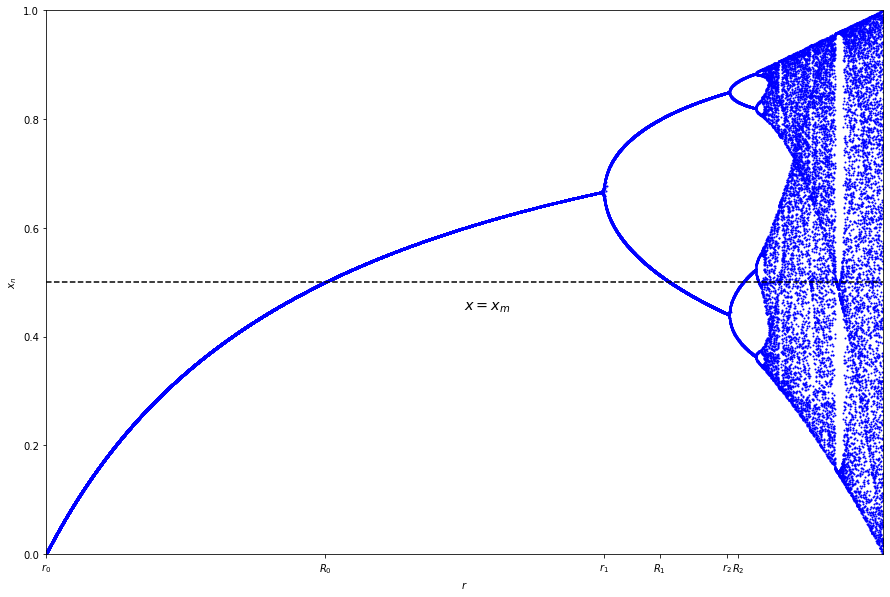

In [17]:
#Plot the logistic map with annotations
plt.figure(figsize=(15, 10))

r_values, x_values = st.logistic_map(100000, 500)

plt.plot(r_values, x_values, 'o', ms = 1, c = 'b')

#Add horizontal line where f(x) is maximised
plt.plot([1, 4], [0.5, 0.5], linestyle = 'dashed', c = 'k')

plt.text(2.5, 0.45, r'$x = x_m$', size = 'x-large')

plt.xticks([1, 2, 3, 3.2, 3.44, 3.48], [r'$r_0$', r'$R_0$', r'$r_1$', r'$R_1$', r'$r_2$', r'$R_2$'])

plt.xlabel(r'$r$')
plt.ylabel(r'$x_n$')

plt.xlim(1, 4)
plt.ylim(0, 1)

plt.show()

In the above graph:

$r_n =$ stable $2^n$-cycle is born

$R_n =$ $2^n$-cycle is superstable

The spacing between the successive $R_n$ shrinks geometrically at a rate $\delta \approx 4.669$ as $n \to \infty$.

The key idea of renormalisation is that the picture looks self-similar (fractal).
> Compare the situation at $R_0$ and $R_1$ and renormalise (scale) one onto the other (p. 387–389).

We can now graph $f \left( x, R_0 \right)$ and $f^2 \left( x, R_1 \right)$ where $x_m =$ superstable fixed point for both.

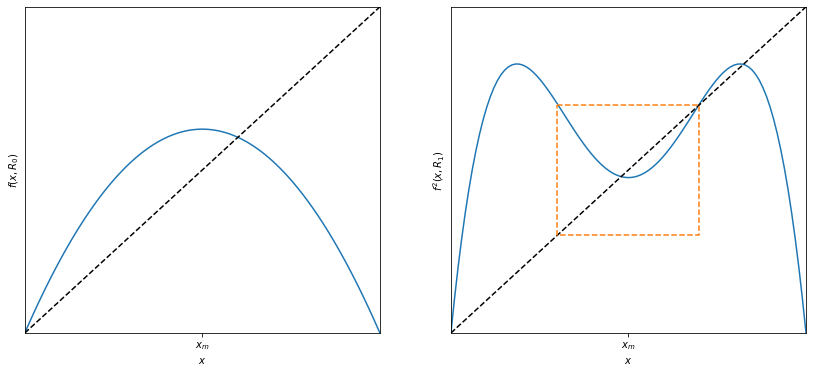

In [22]:
#Format figure and axes
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

for n in range(2):
    ax[n].set_xlabel(r'$x$')
    
    ax[n].set_xlim(0, 1)
    ax[n].set_ylim(0, 1)
    
    ax[n].set_yticks([])
    ax[n].set_xticks([0.5])
    ax[n].set_xticklabels([r'$x_m$'])

ax[0].set_ylabel(r'$f \left( x, R_0 \right)$')

ax[1].set_ylabel(r'$f^2 \left( x, R_1 \right)$')

#Plot f(x, R_0) vs x
ax[0].plot(np.linspace(0, 1, 100), st.logistic(2.5))

#Plot f^2(x, R_1) vs x
ax[1].plot(np.linspace(0, 1, 100), st.logistic(3.3, x_input = st.logistic(3.3)))

#Plot diagonals
ax[0].plot([0, 1], [0, 1], linestyle = 'dashed', c = 'k')
ax[1].plot([0, 1], [0, 1], linestyle = 'dashed', c = 'k')

#Plot self-similar "box"
ax[1].plot([0.3, 0.7, 0.7, 0.3, 0.3], [0.7, 0.7, 0.3, 0.3, 0.7], linestyle = 'dashed')

plt.show()

Note that $f^2 \left( x, R_1 \right)$ has the same local dynamics (similar cobwed diagram) as $f \left( x, R_0 \right)$ after inversion and scaling.

It is helpful to translate the origin to $x_m$ on diagonal (subtract $x_m$ from both $f$ and $x$).
> See p. 389 for the resulting graph.

We then get the result $f \left( x, R_0 \right) \approx \alpha f^2 \left( \frac{x}{\alpha}, R_1 \right) \approx \alpha^2 f^4 \left( \frac{x}{\alpha^2}, R_2 \right) \approx \alpha^n f^{2^n} \left( \frac{x}{\alpha^n}, R_n \right)$ where we have renormalised $n$ times ($\alpha = -2.5...$).

Feigenbaum found numerically that $\lim_\limits{n \to \infty} \alpha^n f^{2^n} \left( \frac{x}{\alpha^n}, R_n \right) = g_0 (x)$ which is a *universal function* with a superstable fixed point.
> The scaling factor $\alpha$ must be chosen correctly for the limit to exist (p. 390).

We can now see where the universality comes from:
- The limiting function $g_0 (x)$ is universal because it only depends on the behaviour of the original function $f$ near $x_m$.

- The global aspects of $f$ are "lost" and only the order/degree of the maximum survives.

- Different universal functions $g(x)$ are found for $f$ with 4th degree maximum etc.

To get other universal functions $g_i (x)$, we start with $f \left( x, R_i \right)$ which has a superstable $2^i$-cycle.

$\Rightarrow g_i (x) = \lim_\limits{n \to \infty} \alpha^n f^{2^n} \left( \frac{x}{\alpha^n}, R_{n+i} \right)$.

Of particular interest is the case $R_i = R_\infty$ at the onset of chaos:

> $f \left( x, R_\infty \right) \approx \alpha f \left( \frac{x}{\alpha}, R_\infty \right)$, so the parameter $r$ need not change.

The limiting function $g(x) = \alpha g^2 \left( \frac{x}{\alpha} \right)$ which is the *functional equation* (self-referential) for $g(x)$ and the universal scaling factor $\alpha$.

We then impose the boundary conditions: $g'(x) = 0$ and $g$ has a quadratic maximum.
> Choose scale $g(0) = 1$. Justification: If $g(x)$ solves the functional equation, so does $\mu g \left( \frac{x}{\mu} \right)$ for any $\mu$.

$g(0) = \alpha g^2 (0) \Rightarrow 1 = \alpha g(1)$, so the scaling factor $\alpha = \frac{1}{g(1)}$.

**Power series solution**: $g(x) = 1 + c_2 x^2 + c_4 x^4 + ...$ from which the coefficients $c_n$ can be found by matching like powers of $x$ on both sides (p. 391).

**Next Actions**:
- ~Finish Exercise 10.3.13~
- ~Read *The Misbehaviour of Markets* $\to$ p. 225~

## Lecture 22 – Renormalisation: Function Space and a Hands-On Calculation

### Renormalisation and Period Doubling (not in the book)

In the previous lecture we defined universal functions and showed how to determine $g_\infty (x)$ (a.k.a. $g(x)$) and $\alpha$. But where does $\delta$ fit in?

$\Rightarrow$ For this, we need to look at an abstract space of functions (functional analysis).

Define an operator $T$ which maps functions to functions (points to points in function space) via $Tf (x) = \alpha f^2 \left( \frac{x}{\alpha} \right)$.

Then, the functional equation corresponds to $g$ being a fixed point of $T$, i.e. $g(x) = \alpha g^2 \left( \frac{x}{\alpha} \right)$.

$\Rightarrow g$ is a saddle point in function space.
\
\
\
To see this, we explore $T g_i$. Recall $g_i =$ universal function with superstable $2^i$-cycle.

Then $T g_i =$ universal function with superstable $2^{i-1}$-cycle, so $T g_i = g_{i-1}$.

E.g. $T g_1 = \alpha g_1^2 \left( \frac{x}{\alpha} \right) = g_0$ where a 2-cycle becomes a fixed point after the second iteration.

**See**: *Schematic Depiction of the Function Space* in My Collection on PebblePad.

### Example of Renormalisation (p. 391–394)

Gives simple approximations of $\alpha$ and $\delta$.

Let $f(x, \mu)$ be any map which has a period-doubling bifurcation occurring at the point $x = 0$ when $\mu = 0$.

Locally, the map then resembles $x_{n+1} = -(1-\mu)x_n + ax_n^2 + O \left( x_n^3 \right)$ since the eigenvalues is $-1$ at the bifurcation.

Without loss of generality, we can rescale $a = 1$ s.t. $x \to \frac{x}{a}$ and the map becomes $x_{n+1} = -(1-\mu)x_n + x_n^2 + ...$ $(*)$ locally.

For $\mu > 0,\exists$ period-2 points $p, q$ s.t. $p = -(1 + \mu) q + q^2$ and $q = -(1 + \mu) p + p^2$.

**Idea**: Look at the dynamics of $f^2$ near $p$ and renormalise the map to look like $(*)$.
\
\
\
Subtracting and factoring out $p - q$, we get $p + q = \mu$ and $pq = -\mu \Rightarrow p = \frac{\mu + \sqrt{\mu^2 + 4 \mu}}{2}$ and $q = \frac{\mu - \sqrt{\mu^2 + 4 \mu}}{2}$.

We now shift the origin to $p$ and look at the local dynamics of $f^2$.

Let $f(x) ? -(1-\mu)x + x^2$. Then $p$ is a fixed point of $f^2$.

We then expand $p + \eta_{n+1} = f^2 \left( p + \eta_n \right)$ in powers of $\eta_n$.

$\Rightarrow \eta_{n+1} = \left( 1 - 4\mu - \mu^2 \right) \eta_n + C \eta_n^2 + ...$ where $C = 4\mu + \mu^2 - 3 \sqrt{\mu^2 + 4\mu}$.

We can now use $C$ as a rescaling parameter to make the $\eta$ map look like $(*)$ with a new $\mu$. Let's call it $\tilde{\mu}$.
\
\
\
Now, let $\tilde{x}_n = C \eta_n$. Then $\tilde{x}_{n+1} = -(1+\tilde{\mu}) \tilde{x}_n + \tilde{x}_n^2 + ...$ where $-(1 + \tilde{\mu}) = 1 - 4 \mu - \mu^2$.

$\Rightarrow \tilde{\mu} = \mu^2 + 4\mu -2$ which we can iterate / renormalise over and over again.

The only fixed point $\tilde{\mu} = \mu$ that has $\mu > 0$ is $\mu_\infty = \mu_\infty^2 + 4 \mu_\infty -2 \Rightarrow \mu_\infty = \frac{1}{2} \left( -3 + \sqrt{17} \right) \approx 0.56$ (p. 393).

We can now check the stability of $\mu_\infty$:

the $\mu$-iteration is $\mu_{k+1} = \mu_k^2 + 4 \mu_k - 2 = f \left( \mu_k \right)$, the eigenvalue of which is $f'\left( \mu_\infty \right) = 2 \mu + 4 \biggr|_{\mu = \mu_\infty} = 1 + \sqrt{17} \approx 5.12$ (cf. $\delta = 4.669...$).

For $C$ we get $C = \frac{1 + \sqrt{17}}{2} - 3 \left( \frac{1 + \sqrt{17}}{2} \right) ^{\frac{1}{2}} \approx -2.24$ (cf. $\alpha = -2.50$).

**Next Up**: [Lecture 23 – Fractals and the Geometry of Strange Attractors](https://www.youtube.com/watch?v=9k5bG6U5byk&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=23) $\to$ More computer work!

## Lecture 23 – Fractals and the Geometry of Strange Attractors

### Picturing the Geometry of Strange Attractors (ch. 11 & 12)

**Q**: How is it possible to expand endlessly (exponential divergence) in a bounded region (strange attractor)?

**A**: Repeated stretching, folding, and re-injection of the phase space (cf. making puff pastry).

$\Rightarrow$ See: p. 430 'Making Pastry'

**Book to check out**: *Dynamics: The Geometry of Behavior* by Abraham & Shaw $\to$ fully visual approach to chaotic dynamics

**Example**: Rössler Attractor

Simplest known strange attractor with just one nonlinearity ($xz$).

Governing equations:

$\dot x = - y - z$

$\dot y = x + a y$

$\dot z = b + z \left( x - c \right)$

where the typical parameter values are $a = b = 0.2, c = 5.7$.

We can graph this by slightly modifying the Lorenz attractor functions in slicc_tools.py.

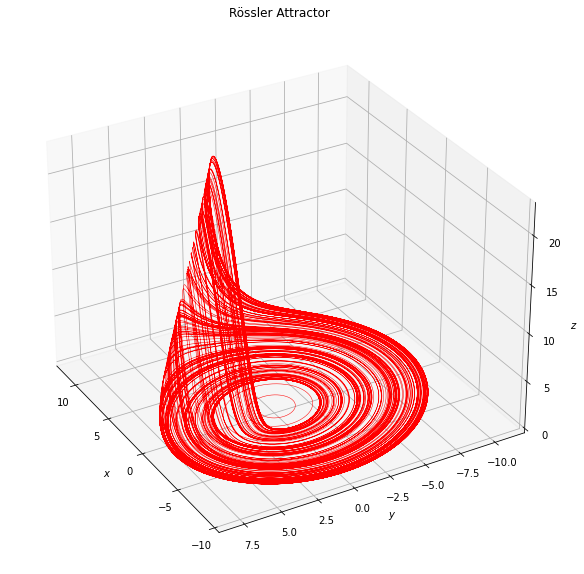

In [27]:
#Define the governing equations of the Rössler system
def rossler(v, a, b, c):
    x, y, z = v[0], v[1], v[2]
    
    x_deriv = - y - z
    y_deriv = x + a * y
    z_deriv = b + z * (x - c)
    
    return np.array([x_deriv, y_deriv, z_deriv])

#Create a function to return the (x, y, z) and t values of the Rössler system
def rossler_values(a, b, c, t, time_step = 0.01, transient = 0, v_0 = [0, 1, 0]):
    #Create lists of the (x, y, z) and time values
    dim_values = [[], [], []]
    t_values = []
    
    #Define the Rössler equations with fixed parameters
    def rossler_var(v):
        return rossler(v, a = a, b = b, c = c)
    
    #Declare initial condition
    v = v_0
    
    #Iterate over time steps
    for step in np.arange(0, t, time_step):
        t_values.append(step)
        
        #Add new values of (x, y, z) to the list dim_values
        for m in range(3):
            dim_values[m].append(v[m])
     
        #Retrieve the next coordinates using fourth-order Runge-Kutta
        v = st.runge_kutta(v, rossler_var, dt = time_step)
    
    return dim_values, t_values


#Format figure for 3D plotting
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')

ax.set_title('Rössler Attractor')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')
ax.set_zlabel(r'$z$')

#Assign coordinate values from lorenz_values to three lists
x, y, z = rossler_values(0.2, 0.2, 5.7, 1000)[0]

#Plot the attractor in 3D
ax.plot3D(x, y, z, c = 'r', linewidth = 0.5)

#Adjust viewing angle
ax.view_init(30, 150)

plt.show()

We now take the $yz$ *Poincaré section* along $x = 0$:

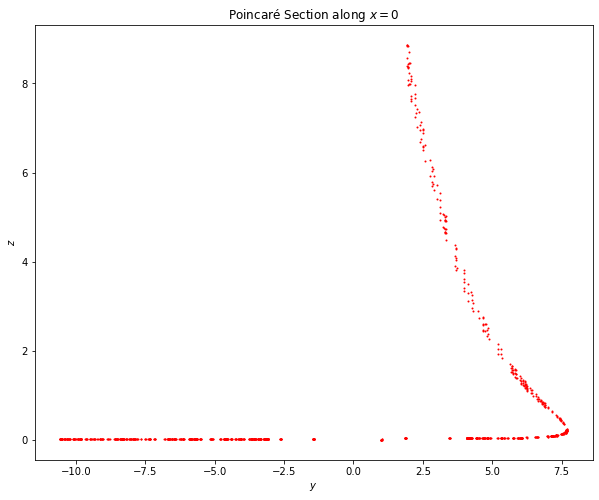

In [28]:
plt.figure(figsize=(10, 8))

for n in range(len(x)):
    #Plot the (y, z) values within a given threshold
    if abs(x[n]) < 0.1:
        plt.plot(y[n], z[n], 'o', ms = 1, c = 'r')
        
    else:
        continue

plt.title(r'Poincaré Section along $x = 0$')
plt.xlabel(r'$y$')
plt.ylabel(r'$z$')
        
plt.show()

We then take a further *Lorenz section* along $z = 0$:

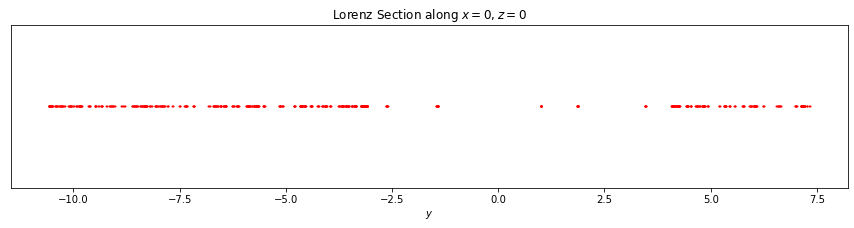

In [29]:
plt.figure(figsize=(15, 3))

for n in range(len(x)):
    #Plot the (y, z) values within a given threshold
    if abs(x[n]) < 0.1 and abs(z[n]) < 0.1:
        plt.plot(y[n], 0, 'o', ms = 1, c = 'r')
        
    else:
        continue

plt.title(r'Lorenz Section along $x = 0, z = 0$')
plt.xlabel(r'$y$')
plt.yticks([])

plt.show()

This bears a striking resemblence to the *Cantor set* (ch. 11.2) $\rightarrow$ fractal microstructure / Lorenz's "infinite complex of surfaces".

### Cantor Set (p. 408–411)

A fractal formed by starting with the closed interval $S_0 = \left[ 0, 1 \right]$ and removing the middle third, repeating this process for each of the remaining intervals for an infinite number of times.

$\Rightarrow$ Finally we get the *Cantor set* $C = S_\infty$ of an infinite number of infinitesimal pieces ("Cantor dust") separated by gaps of varying sizes (cf. above).

See Strogatz's textbook for a discussion on countable vs. uncountable sets $\rightarrow$ touches on *group theory*.

#### Properties of the Cantor Set

1) It has a total "length" (measure) of zero.
> $|S_0| = 1, |S_1| = \frac{2}{3}, |S_2| = \frac{4}{9} = \left( \frac{2}{3} \right)^2$, i.e. $|S_n| = \left( \frac{2}{3} \right)^n$, so $|S_n| \to 0$ as $n \to \infty$.

2) It has an *uncountable* number of points.
> It consists of all points $x \in \left[ 0, 1 \right]$ whose base-3 expansion can be written solely in terms of 0's and 2's (Example 11.2.2, p. 410).

3) It is *self-similar*, i.e. it contains arbitrarily small copies of itself.

4) It has a fractional (similarity) dimension $d = \frac{\ln{2}}{\ln{3}} \approx 0.63$ (p. 413–415).
> The similarity dimension is given by $m = r^d \Rightarrow d = \frac{\ln{m}}{\ln{r}}$ where $m =$ the number of copies and $r =$ scale factor.

**Next Actions**:
- Watch [Lecture 24 – Hénon Map](https://www.youtube.com/watch?v=LPILtK-53m8&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=24)
- Finish LinkedIn Learning module on OOP techniques (Monday)
- Schedule and begin writing the Final Reflective Report
- ~Work through the exercise 11.3.8 (Sierpinski carpet)~
- ~Read *The Misbehaviour of Markets* $\to$ p. 253 ('Ten Heresies of Finance')~

**Exercise 11.3.8** Sierpinski carpet

**a)** The sketched solution can be found [here](https://github.com/mikakonte/slicc_2021/blob/main/graphs/sierpinski.jpg).

**b)** The next iteration in the  Sierpinski carpet series is obtained by scaling the pattern down by a factor of 3 and replicating the result 8 times.

Thus, $m = 8$ and $r=3 \Rightarrow d = \frac{\ln{8}}{\ln{3}} \approx 1.893$ which is the similarity dimension.

**c)** After each iteration, the area of the carpet shrinks by a factor $\frac{8}{9}$, i.e. $A_{i+1} = \frac{8}{9} A_i$.

$\Rightarrow$ After $n$ iterations, the total area of the carpet is then $A_n = \left( \frac{8}{9} \right)^n$, so $A_n \to 0$ as $n \to \infty$.

Hence the Sierpinski carpet has zero area.